<a href="https://colab.research.google.com/github/Spatino87/Predictive_Analytics/blob/main/Apple_Tweets_Sentiment_Analysis_12_20_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Create an algorithm that tells us if a phrase is positive or negative based on the data

#Task 2a: Install the Needed Libraries

In [3]:
#N/A

#Task 2b: Import the Needed Libraries

In [4]:
import re # provides function for working with regular expressions
import pickle # implements binary protocols for serializing and de-serialzing a Python object structure
import numpy as np # used for working with arrays as well as functions used for linear algebra and matrices
import pandas as pd # used for working with datasets. It has functions for analyzing, cleaning, exploring and manipulating data.
import seaborn as sns # seaborn is a python data visualization library based on matplotlib
import matplotlib.pyplot as plt # pyplot intended for interactive plots and simple cases of plot generation
import plotly
import cufflinks as cf # cufflinks is used to make prettier graphs, interaction with your charts
from IPython.display import Image # allows to paint picture
import joblib # a set of tools to provide lighweight pipelining in Python
from joblib import Parallel, delayed # delayed function is used to create a deferred function call

# nltk
import nltk # used for natural language processing and computational lingustics
from nltk.stem import WordNetLemmatizer # allows lemmatizaion to be peformed on words, which is the process of reducing a word to its base
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords,wordnet
from nltk import NaiveBayesClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

# sklearn
from sklearn.svm import LinearSVC # support vector machines are a set of supervised learning methods used for classification, regresssion and outliers detections.
from sklearn.naive_bayes import BernoulliNB # classifier for multivariate Bernoulli models, designed for binary/booleans features
from sklearn.linear_model import LogisticRegression # this class implements regularized logistic regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.models import load_model

from sklearn.model_selection import train_test_split # split arrays or matrices into random train and test subsets
from sklearn.feature_extraction.text import TfidfVectorizer # library for vectorizing and tokenizing
from sklearn.metrics import classification_report # build a text report showing the main classification metrics
from sklearn.pipeline import Pipeline # to assemble several steps that can be cross-validated together while setting different parameters

sns.set()

In [5]:
nltk.download('omw-1.4') # open mutlilingual wordnet, wordnet is a lexical database of semantics relations between words in various languages, omw extends this concept to multiple languages
nltk.download('wordnet') # is a lexical database of the english language that organizes words according to their meaning, providing synonyms, and other lexical relationships
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Task 3: Load the Data

In [6]:
encoding = "ISO-8859-1" # character encoding standard, International Organization for Standardization, limited to western europe

In [7]:
# Create a dataframe from csv file from github repo
df = pd.read_csv('https://raw.githubusercontent.com/Spatino87/ML_Data/main/Apple-Twitter-Sentiment-DFE.csv', encoding = encoding)

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [8]:
# Show the first 5 rows of the df
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [9]:
# Show 5 random rows of df
df.sample(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
1339,623496863,False,finalized,3,12/11/14 22:14,3,1.0000,Thu Dec 04 17:42:46 +0000 2014,5.410000e+17,#AAPL OR @Apple,NaN,when this iwatch finna drop fam @apple
3566,623499096,False,finalized,3,12/12/14 2:08,1,1.0000,Tue Dec 09 07:08:57 +0000 2014,5.420000e+17,#AAPL OR @Apple,NaN,"No, @Apple, don't 'remind me tomorrow'. Just f..."
3369,623498899,False,finalized,6,12/11/14 20:17,3,0.6801,Tue Dec 09 01:30:01 +0000 2014,5.420000e+17,#AAPL OR @Apple,NaN,RT @TeamCavuto: Protesters stage #DieIn protes...
1735,623497259,False,finalized,3,12/12/14 0:40,1,1.0000,Thu Dec 04 23:24:43 +0000 2014,5.410000e+17,#AAPL OR @Apple,NaN,@morrisjordan42 I would say it had a good life...
3163,623498693,False,finalized,7,12/11/14 14:23,1,0.5919,Mon Dec 08 20:43:04 +0000 2014,5.420000e+17,#AAPL OR @Apple,NaN,@viticci when is @Dropbox removing photo uploa...


In [10]:
# Show the columns of the df
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

##Get Data Info

In [11]:
# show how many columns and rows the df has
df.shape

(3886, 12)

In [12]:
# provides a concise summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [13]:
# generate descriptive statistics of numerical columns of a dataframe
df.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


##Find Missing Values

In [14]:
# Tells us if the df contains any null values
df.isnull().values.any()

True

In [15]:
# what columns contain null values
df.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

<Axes: >

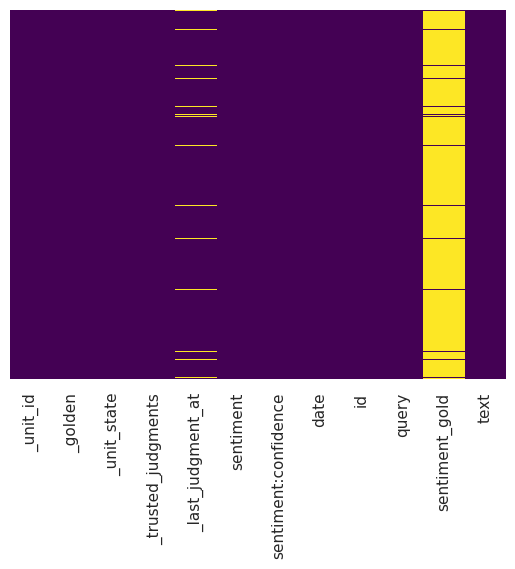

In [16]:
# viz of any null values in df
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
# How many tweets we have
print('There are', df.shape[0], 'tweets')

# check for duplicates
print("There are", len(df[df.duplicated()]), "duplicates")

# check if we have missing values
print("There are", df.isnull().sum().sum(), "missing values")

There are 3886 tweets
There are 0 duplicates
There are 3886 missing values


#Task 5: Perform Data Cleaning

In [18]:
# Removing the unnecessary columns.
df = df[['sentiment','text']]

In [19]:
# Set display options to show the full width of the column
pd.set_option('display.max_colwidth', None)

In [20]:
df.head()

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,3,My cat only chews @apple cords. Such an #AppleSnob.
3,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,3,Nobody expects the Spanish Inquisition #AAPL


In [21]:
# check for unique values in the sentiment column
# working with a target columns looking for 0s and 1s
df['sentiment'].unique()

array(['3', '5', '1', 'not_relevant'], dtype=object)

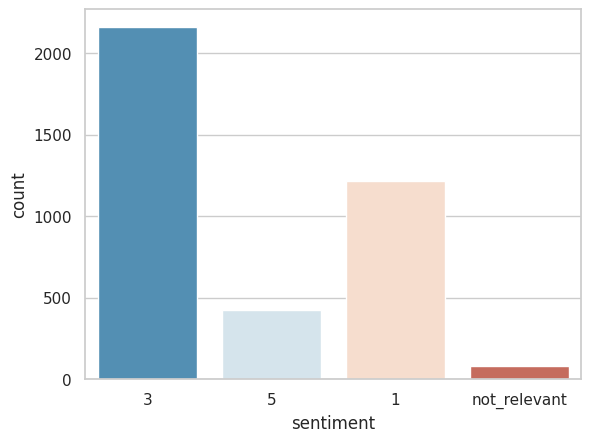

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='sentiment', data=df, palette='RdBu_r');

In [23]:
# show 10 rows for not_relevant
filtered_df = df[df['sentiment'] == 'not_relevant']
filtered_df.head(10)

,sentiment,text
17,not_relevant,"@Apple John Cantlie has been a prisoner of ISIS for 739 days, show you have not abandoned him. Sign https://t.co/WTn4fuiJ0P"
20,not_relevant,$AAPL dip only momentarily....just an aberration in the equity world..#AAPL
75,not_relevant,My daughter's @Apple #iPod stolen. To the thief: try working as hard to earn one - like my daughter had to buy hers. #LosingFaithInPeople
106,not_relevant,RT Chayton Falke ChaytonFalke :#Nasdaq100 #recent #market #exit #4: Sold $AAPL long for a 10.49% #gain in 20 days. #AAPL #forex #trading...
115,not_relevant,Myths vs. Reality in Full-Time #Trading http://t.co/JH7BMS1Kgb #stocks\n#futures #forex #trader #es #nq #cl #aapl #gpro #finance #eSignal
129,not_relevant,#GoPro: What Competition? Part 2 #GPRO #AAPL #SNE http://t.co/4tgYDYdprt
161,not_relevant,Why is it that the no firm has acquired the bloomberg terminal service yet #aapl? I wish it had a #goog search function.
205,not_relevant,holy shit what have I missed what did Obama do this time \n#stocks #NASDAQ #NYSE #AAPL #DOWJ http://t.co/ZMKp6xyJk4
241,not_relevant,Benzinga's Top #PreMarket Losers http://t.co/vfUSrHxQX0 #AAPL #GOLD #NEM #News #NVAX #PreMarket #Markets
264,not_relevant,@JustinPulitzer Looking for $105-$109... #AAPL


In [24]:
# based on the above will drop the rows with "not relevant" from the analysis
df = df[df['sentiment'] != 'not_relevant']

In [25]:
# check data types
df.dtypes

sentiment    object
text         object
dtype: object

In [26]:
# Convert 'sentiment' column from object to int64
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

In [27]:
# check data types
df.dtypes

sentiment     int64
text         object
dtype: object

In [28]:
df['feedback'] = df['sentiment'].apply(lambda x: "Positive" if (x > 1) else "Negative")

In [29]:
df.head()

,sentiment,text,feedback
0,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,Positive
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,Positive
2,3,My cat only chews @apple cords. Such an #AppleSnob.,Positive
3,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",Positive
4,3,Nobody expects the Spanish Inquisition #AAPL,Positive


In [30]:
filtered_df = df[df['feedback'] == 'Positive']
filtered_df.head(10)

,sentiment,text,feedback
0,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,Positive
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,Positive
2,3,My cat only chews @apple cords. Such an #AppleSnob.,Positive
3,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",Positive
4,3,Nobody expects the Spanish Inquisition #AAPL,Positive
5,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS,Positive
6,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB,Positive
7,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK,Positive
8,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL,Positive
9,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd,Positive


In [31]:
# changing string data to where a machine learning model can deal with it
sentiment = pd.get_dummies(df['feedback'], drop_first=True)

In [32]:
# dropping the original string columns
df.drop(['sentiment','feedback'], axis=1, inplace=True)

In [33]:
# joining df with new created binary columns
df = pd.concat([df, sentiment], axis=1)

In [34]:
df.head()

,text,Positive
0,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,1
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,1
2,My cat only chews @apple cords. Such an #AppleSnob.,1
3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",1
4,Nobody expects the Spanish Inquisition #AAPL,1


In [35]:
df.rename(columns={'Positive': 'sentiment'}, inplace=True)

In [36]:
#df['sentiment'].value_counts()
df['sentiment'].value_counts()

1    2585
0    1219
Name: sentiment, dtype: int64

In [37]:
df['sentiment'].unique()

array([1, 0], dtype=uint8)

#Task 6: Visualize Cleaned up Dataset

In [38]:
# shape of new dataframe
df.shape

(3804, 2)

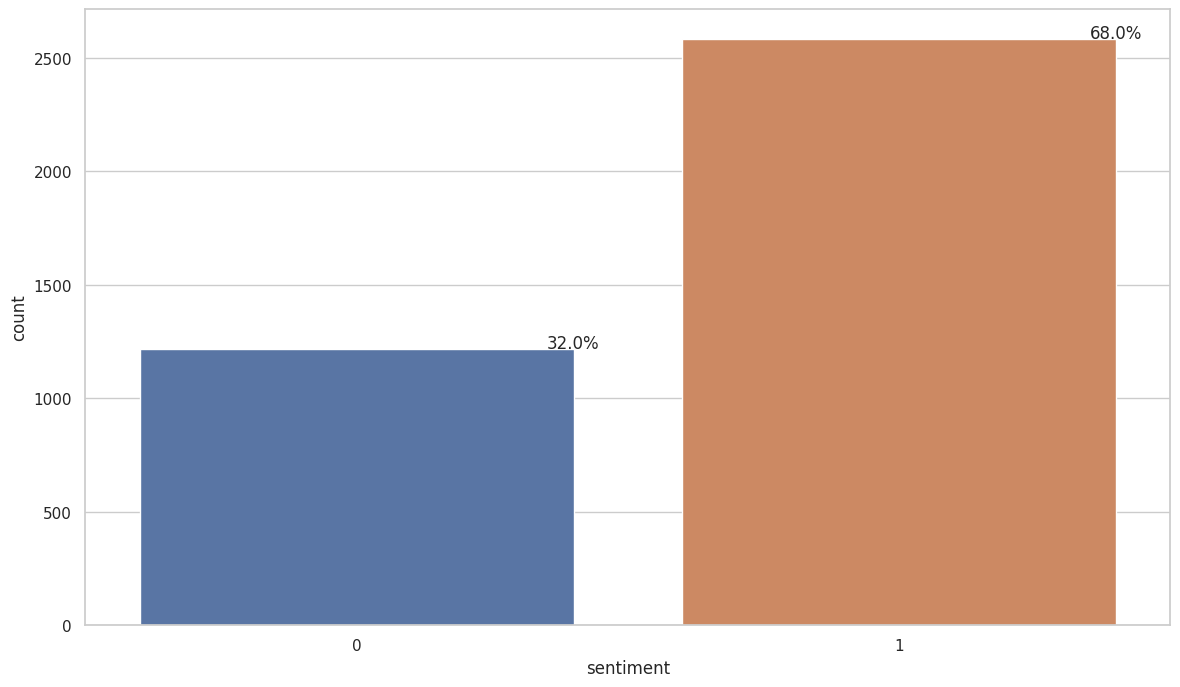

In [39]:
#  plot of new dataframe
plt.figure(figsize=(14,8))
total = float(len(df))
ax = sns.countplot(x="sentiment", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

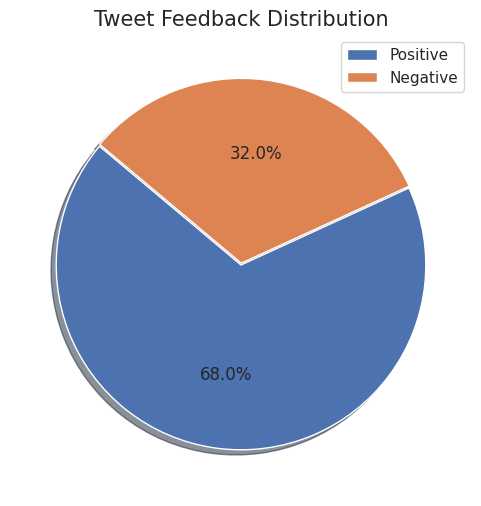

In [40]:
plt.figure(figsize=(6, 6))

explode = [0, 0.01]
plt.pie(df['sentiment'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Positive', 'Negative'])
plt.title('Tweet Feedback Distribution', fontsize=15)
plt.axis('off');

#Task 7: Conceptualize the problem

In [41]:
df.head()

,text,sentiment
0,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,1
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,1
2,My cat only chews @apple cords. Such an #AppleSnob.,1
3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",1
4,Nobody expects the Spanish Inquisition #AAPL,1


In [42]:
# Storing data in lists. To be able seperate chunks of text
text, sentiment = list(df['text']), list(df['sentiment'])

In [43]:
text[24]

"@ me RT @101Baemations: Can't stand those ppl with @Apple stickers everywhere. 9/10 they prob just bought an iPod shuffle"

In [44]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [45]:
# Defining set containing all stopwords in english.
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [46]:
# grouping together the inflected forms ("better" -> "good")
lemmatizer = WordNetLemmatizer()

In [47]:
# Save this function and put in arsenal
# using re and matches the patterns its going to take that chunk of text and assigned it
# replace tweet with data for more generalization
# this is preprocessig data

def preprocess(textdata):
    processed_texts = []

    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user_pattern = '@[^\s]+'
    alpha_pattern = "[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
            # Replace @USERNAME to 'USER'.
        tweet = re.sub(user_pattern, ' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        preprocessed_words = []
        for word in tweet.split():
            # Check if the word is a stopword.
            if len(word) > 1 and word not in stopwords:
                # Lemmatizing the word.
                word = lemmatizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts

In [48]:
# We created a list of texts that it found in the dataset
processedtext = preprocess(text)

#Task 8: Perform Data-Split

In [49]:
# split the data inot train and test sets
# tell the machine take 30% and make it into test
x_train,x_test,y_train,y_test = train_test_split(processedtext, sentiment, test_size = 0.30, random_state = 0)

In [50]:
# Used in NLP tasks such as text classifcation or clustering
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 500000)
vectorizer.fit(x_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [51]:
# this converts our data into a matrix of TF-IDF features basedon on the vocab learned during the fitting process
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

In [52]:
x_train.shape

(2662, 17109)

In [53]:
x_test.shape

(1142, 17109)

#Task 9: Choose the ML Method to follow

In [54]:
# Function that takes a ml model as an argument
def model_evaluate(model):
  # uses the given model to predict the labels for the test dataset
    y_pred = model.predict(x_test)
  # prints out report comparing the actual labels against the predicted labels
    print(classification_report(y_test, y_pred))

#Task 10: Train the ML Model

In [55]:
# is a classification algorithm used for binary and mutliclass classification problems
# c = 2 parameter control the regularization strength
# max _iter = 1000 maximum number of iteration taken for the optimization algorithm to converge
# n_jobs =-1 indicates that the computation will be done in parallel, utilizing all available CPU cores
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
# fits the Logistic Regression model to the training data
LRmodel.fit(x_train, y_train)
# after training the model, this line calls the model_evaluate function to evaluate the performance of the model on a separate test dataset
model_evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       362
           1       0.83      0.95      0.88       780

    accuracy                           0.83      1142
   macro avg       0.84      0.76      0.78      1142
weighted avg       0.83      0.83      0.82      1142



In [56]:
# Linear Supports Vector Classification model used for binary and multiclassification tasks
# Creates an instance of the LinearSVC model with defaul settings
SVCmodel = LinearSVC()
# trains the model using the training data
SVCmodel.fit(x_train, y_train)
# assess the performance
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.83      0.63      0.72       362
           1       0.85      0.94      0.89       780

    accuracy                           0.84      1142
   macro avg       0.84      0.78      0.80      1142
weighted avg       0.84      0.84      0.83      1142



In [57]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(x_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       1.00      0.05      0.10       362
           1       0.69      1.00      0.82       780

    accuracy                           0.70      1142
   macro avg       0.85      0.53      0.46      1142
weighted avg       0.79      0.70      0.59      1142



#Task 11: Test the Model

In [58]:
x_train, x_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.50, random_state = 0)

pipe = Pipeline([('vectorizer', vectorizer), ('svc', SVCmodel)])
pipe.fit(x_train, y_train)

model_evaluate(pipe)

              precision    recall  f1-score   support

           0       0.83      0.63      0.72       595
           1       0.85      0.94      0.89      1307

    accuracy                           0.84      1902
   macro avg       0.84      0.79      0.81      1902
weighted avg       0.84      0.84      0.84      1902



In [59]:
# save model
with open('/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 5/Projects/Sentiment Analysis/model.pkl', 'wb') as file:
  pickle.dump(pipe, file)
# if file does not exists it will create one i.e. model_pipe.pickle
# wb = write

In [60]:
#from google.colab import drive
#drive.mount('/content/drive')

In [61]:
# load model
with open('/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 5/Projects/Sentiment Analysis/model.pkl', 'rb') as file:
  loaded_pipe = pickle.load(file)

In [62]:
model_evaluate(loaded_pipe)

              precision    recall  f1-score   support

           0       0.83      0.63      0.72       595
           1       0.85      0.94      0.89      1307

    accuracy                           0.84      1902
   macro avg       0.84      0.79      0.81      1902
weighted avg       0.84      0.84      0.84      1902



In [63]:
def predict(model, text):
    # Predict the sentiment
    preprocessed_text = preprocess(text)
    predictions = model.predict(preprocessed_text)

    pred_to_label = {0: 'Negative', 1: 'Positive'}

    # Make a list of text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data

In [64]:
text = ["Machine Learning is hard"]
prediction = predict(loaded_pipe, text)
print(prediction)

[('Machine Learning is hard', 0, 'Negative')]


In [65]:
text = ["Machine Learning is the biggest"]
prediction = predict(loaded_pipe, text)
print(prediction)

[('Machine Learning is the biggest', 1, 'Positive')]
